In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.io import arff

## Диагностика хронического заболевания почек
## Набор данных: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
_Abstract: This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period._

In [2]:
data_file_name = 'chronic_kidney_disease_full.csv'
full_data_frame = pd.read_csv(data_file_name)

In [3]:
full_data_frame.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


<a id="Описание набора данных"> </a>

### Описание набора данных

| # | Full name | Type | Short name | Description |
| -- | -- | -- | -- | -- |
| 1 | Age | numerical | age | in years |
| 2 | Blood Pressure | numerical | bp | in mm/Hg |
| 3 | Specific Gravity | nominal  | sg | 1.005, 1.010, 1.015, 1.020, 1.025 |
|4 | Albumin | nominal |  al | 0, 1, 2, 3, 4, 5 |
| 5 | Sugar | nominal | su | 0, 1, 2, 3, 4, 5 |
|6 | Red Blood Cells |nominal | rbc | normal, abnormal |
|7 | Pus Cell | nominal | pc | normal, abnormal |
|8 | Pus Cell clumps | nominal | pcc | present, notpresent |
|9 | Bacteria | nominal | ba | present, notpresent |
|10 | Blood Glucose Random | numerical | bgr | in mgs/dl |
|11 | Blood Urea | numerical | bu | in mgs/dl |
|12 | Serum Creatinine | numerical | sc | in mgs/dl |
|13 | Sodium | numerical | sod | in mEq/L |
|14 | Potassium | numerical | pot | in mEq/L |
|15 | Hemoglobin | numerical | hemo | in gms |
|16 | Packed Cell Volume | numerical |  pcv | |
|17 | White Blood Cell Count | numerical | wbcc | in cells/cumm |
|18 | Red Blood Cell Count | numerical | rbcc | in millions/cmm |
|19 | Hypertension | nominal | htn | yes, no |
|20 | Diabetes Mellitus | nominal | dm | yes, no |
|21 | Coronary Artery Disease | nominal | cad | yes, no |
|22 | Appetite | nominal | appet | good, poor |
|23 | Pedal Edema | nominal | pe | yes, no |
|24 | Anemia | nominal | ane | yes, no |
|25 | __Class__ | __nominal__ | __class__ | __ckd, notckd__ |

## 1. Анализ данных

In [4]:
full_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


## Пропущенные значения

In [5]:
full_data_frame.count().sort_values()/len(full_data_frame)

rbc      0.6200
rbcc     0.6725
wbcc     0.7350
pot      0.7800
sod      0.7825
pcv      0.8225
pc       0.8375
hemo     0.8700
su       0.8775
sg       0.8825
al       0.8850
bgr      0.8900
bu       0.9525
sc       0.9575
bp       0.9700
age      0.9775
ba       0.9900
pcc      0.9900
htn      0.9950
dm       0.9950
cad      0.9950
appet    0.9975
pe       0.9975
ane      0.9975
class    1.0000
dtype: float64

### В категориальном параметре rbc  больше трети пропущенных значений. Замена их по простому правилу, например, наиболее частым значением, представляется нецелесообразным. Отбросить этот параметр тоже не хотелось бы - данных, в целом, и так не много.
### В параметрах rbcc, wbcc, pot, sod также много пропущенных значений.
### Используем алгоритм Iterative imputer, вычисляющий значения пропущенных переменных на основании значений других параметров.
### Отсутствующие значения численных параметров заполним медианными значениями.

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
smart_imputer = IterativeImputer(max_iter=10, random_state=1812, initial_strategy='most_frequent')

### Для обучения алгоритма нужно перекодировать все номинативные параметры.
### Большинство из них принимают лишь два каких-то значения, используем one-hot кодирование.

In [8]:
full_data_frame.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [9]:
nominal_parameters = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
encodable_parameters = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
numerical_parameters = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

In [10]:
full_encoded = pd.get_dummies(full_data_frame, drop_first=True, columns=encodable_parameters)
full_encoded['class'] = full_encoded['class'].apply(lambda x: 1 if x == 'ckd' else 0)
smart_imputer.fit(full_encoded)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='most_frequent',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=1812,
                 sample_posterior=False, tol=0.001, verbose=0)

In [11]:
full_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 36 columns):
age            391 non-null float64
bp             388 non-null float64
bgr            356 non-null float64
bu             381 non-null float64
sc             383 non-null float64
sod            313 non-null float64
pot            312 non-null float64
hemo           348 non-null float64
pcv            329 non-null float64
wbcc           294 non-null float64
rbcc           269 non-null float64
class          400 non-null int64
sg_1.01        400 non-null uint8
sg_1.015       400 non-null uint8
sg_1.02        400 non-null uint8
sg_1.025       400 non-null uint8
al_1.0         400 non-null uint8
al_2.0         400 non-null uint8
al_3.0         400 non-null uint8
al_4.0         400 non-null uint8
al_5.0         400 non-null uint8
su_1.0         400 non-null uint8
su_2.0         400 non-null uint8
su_3.0         400 non-null uint8
su_4.0         400 non-null uint8
su_5.0         400 non-

In [12]:
full_encoded.columns

Index(['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
       'rbcc', 'class', 'sg_1.01', 'sg_1.015', 'sg_1.02', 'sg_1.025', 'al_1.0',
       'al_2.0', 'al_3.0', 'al_4.0', 'al_5.0', 'su_1.0', 'su_2.0', 'su_3.0',
       'su_4.0', 'su_5.0', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes'],
      dtype='object')

In [13]:
nominal_parameters = [
    'class',
    'sg_1.01', 'sg_1.015', 'sg_1.02', 'sg_1.025',
    'al_1.0', 'al_2.0', 'al_3.0', 'al_4.0', 'al_5.0',
    'su_1.0', 'su_2.0', 'su_3.0', 'su_4.0', 'su_5.0',
    'rbc_normal',
    'pc_normal',
    'pcc_present',
    'ba_present',
    'htn_yes',
    'dm_yes',
    'cad_yes',
    'appet_poor',
    'pe_yes',
    'ane_yes'
]
encodable_parameters = [
    'sg_1.01', 'sg_1.015', 'sg_1.02', 'sg_1.025',
    'al_1.0', 'al_2.0', 'al_3.0', 'al_4.0', 'al_5.0',
    'su_1.0', 'su_2.0', 'su_3.0', 'su_4.0', 'su_5.0',
    'rbc_normal',
    'pc_normal',
    'pcc_present',
    'ba_present',
    'htn_yes',
    'dm_yes',
    'cad_yes',
    'appet_poor',
    'pe_yes',
    'ane_yes'
]

In [14]:
imputed_data = full_encoded.fillna(pd.DataFrame(smart_imputer.transform(full_encoded), columns=full_encoded.columns))

In [15]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 36 columns):
age            400 non-null float64
bp             400 non-null float64
bgr            400 non-null float64
bu             400 non-null float64
sc             400 non-null float64
sod            400 non-null float64
pot            400 non-null float64
hemo           400 non-null float64
pcv            400 non-null float64
wbcc           400 non-null float64
rbcc           400 non-null float64
class          400 non-null int64
sg_1.01        400 non-null uint8
sg_1.015       400 non-null uint8
sg_1.02        400 non-null uint8
sg_1.025       400 non-null uint8
al_1.0         400 non-null uint8
al_2.0         400 non-null uint8
al_3.0         400 non-null uint8
al_4.0         400 non-null uint8
al_5.0         400 non-null uint8
su_1.0         400 non-null uint8
su_2.0         400 non-null uint8
su_3.0         400 non-null uint8
su_4.0         400 non-null uint8
su_5.0         400 non-

In [16]:
processed_data = full_encoded
processed_data['rbc_normal'] = imputed_data['rbc_normal']
processed_data['rbcc'] = imputed_data['rbcc']
processed_data['wbcc'] = imputed_data['wbcc']
processed_data['pot'] = imputed_data['pot']
processed_data['sod'] = imputed_data['sod']
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 36 columns):
age            391 non-null float64
bp             388 non-null float64
bgr            356 non-null float64
bu             381 non-null float64
sc             383 non-null float64
sod            400 non-null float64
pot            400 non-null float64
hemo           348 non-null float64
pcv            329 non-null float64
wbcc           400 non-null float64
rbcc           400 non-null float64
class          400 non-null int64
sg_1.01        400 non-null uint8
sg_1.015       400 non-null uint8
sg_1.02        400 non-null uint8
sg_1.025       400 non-null uint8
al_1.0         400 non-null uint8
al_2.0         400 non-null uint8
al_3.0         400 non-null uint8
al_4.0         400 non-null uint8
al_5.0         400 non-null uint8
su_1.0         400 non-null uint8
su_2.0         400 non-null uint8
su_3.0         400 non-null uint8
su_4.0         400 non-null uint8
su_5.0         400 non-

### Для замены отсутствующих численных значений нужно оценить медианы параметров. Для более адекватной оценки избавимся от "выбросов".

In [17]:
processed_data[numerical_parameters].describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000000,42.000000,55.000000,64.5,90.0
bp,388.0,76.469072,13.683637,50.000000,70.000000,80.000000,80.0,180.0
bgr,356.0,148.036517,79.281714,22.000000,99.000000,121.000000,163.0,490.0
bu,381.0,57.425722,50.503006,1.500000,27.000000,42.000000,66.0,391.0
sc,383.0,3.072454,5.741126,0.400000,0.900000,1.300000,2.8,76.0
sod,400.0,137.349680,9.948735,4.500000,135.000000,138.000000,141.0,163.0
pot,400.0,4.547006,2.864228,-0.420019,3.800000,4.385327,4.9,47.0
hemo,348.0,12.526437,2.912587,3.100000,10.300000,12.650000,15.0,17.8
pcv,329.0,38.884498,8.990105,9.000000,32.000000,40.000000,45.0,54.0
wbcc,400.0,8429.240364,2531.497270,2200.000000,6975.000000,8300.000000,9400.0,26400.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000090D346FAC8>,
      dtype=object)

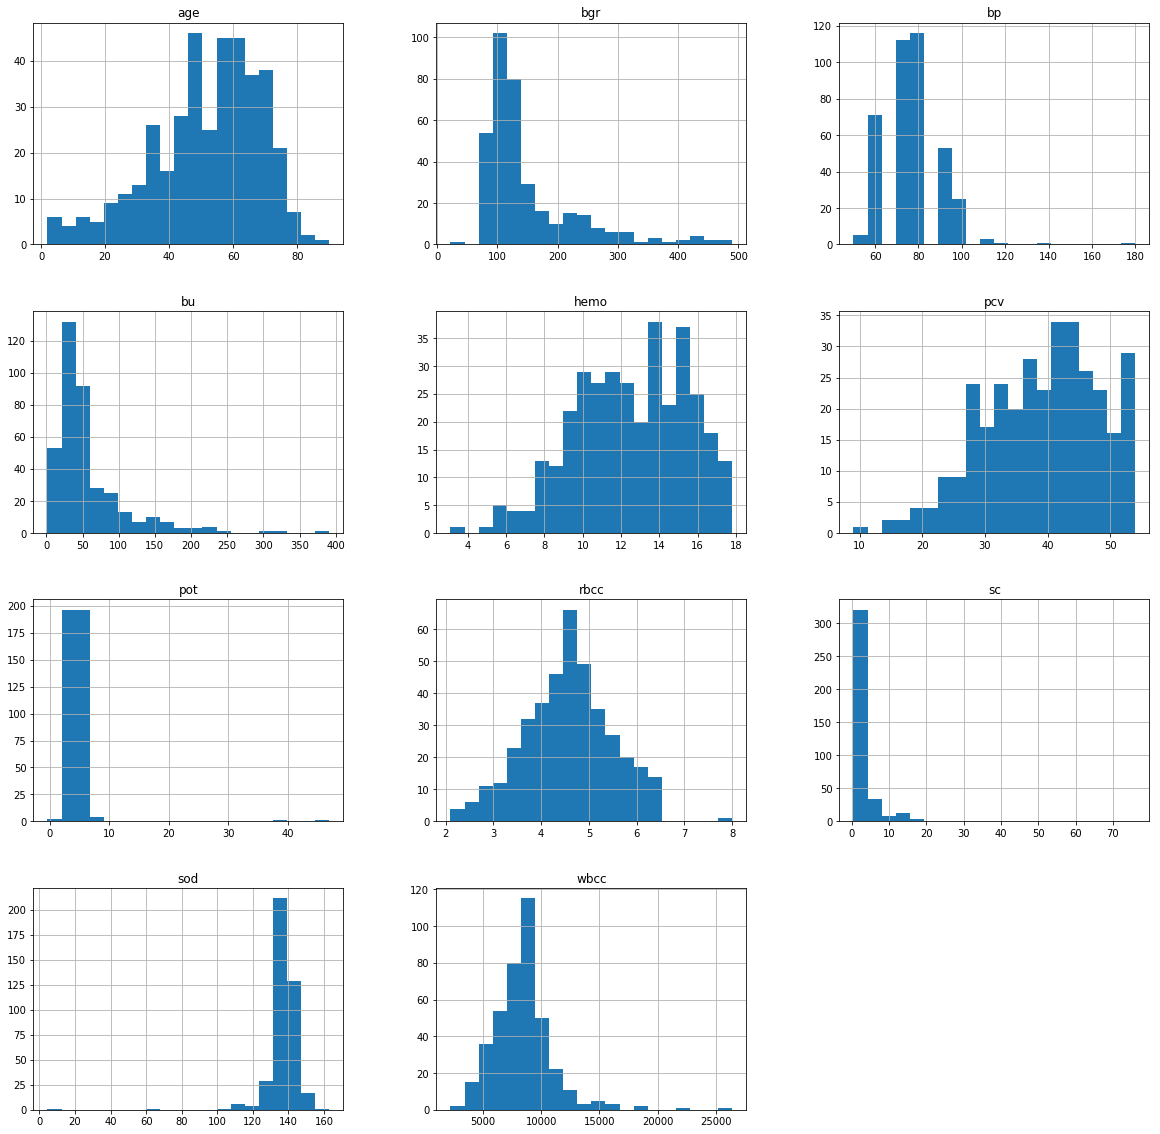

In [18]:
processed_data[numerical_parameters].hist(bins=20, figsize=(20, 20))

In [19]:
def outlier_detect_mean_std(data,col,threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    #print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [20]:
def multi_mean_std_outlier(data, columns=[], threshold=3):
    if len(columns)==0:
        columns = data.columns.to_list()
    result = pd.DataFrame()
    outlier_indices = None
    outlier_fences = {k:[] for k in columns}
    for col in columns:        
        index, fences = outlier_detect_mean_std(data, col, threshold)        
        if len(index.value_counts()) > 1:            
            outliers_absolute_count = index.value_counts()[1]
        else:
            outliers_absolute_count = 0
        outliers_relative_count = outliers_absolute_count / len(index)
        if outlier_indices is None:
            outlier_indices = data[index].index
        else:
            outlier_indices = outlier_indices.union(data[index].index)
        outlier_fences[col].append(fences[0])
        outlier_fences[col].append(fences[1])
        outlier_fences[col].append(outliers_absolute_count)
        outlier_fences[col].append(outliers_relative_count)
    fences_df = pd.DataFrame(data=outlier_fences, index=['upper_fence', 'lower_fence', 'outliers_total', 'outliers_relative'])
    return outlier_indices, fences_df

In [21]:
outlier_indices, outlier_info = multi_mean_std_outlier(processed_data, numerical_parameters, threshold=3)
outlier_info.T

,upper_fence,lower_fence,outliers_total,outliers_relative
age,102.992518,-0.025766,0.0,0.0000
bp,117.519985,35.418160,3.0,0.0075
bgr,385.881660,-89.808626,10.0,0.0250
bu,208.934739,-94.083296,9.0,0.0225
sc,20.295833,-14.150924,4.0,0.0100
sod,167.195884,107.503475,3.0,0.0075
pot,13.139691,-4.045679,2.0,0.0050
hemo,21.264197,3.788677,1.0,0.0025
pcv,65.854813,11.914184,1.0,0.0025
wbcc,16023.732174,834.748554,6.0,0.0150


In [22]:
print("Общее количество выбросов: ", len(outlier_indices))
print("Общий процент выбросов: ", len(outlier_indices) * 100. / len(processed_data))

Общее количество выбросов:  33
Общий процент выбросов:  8.25


In [23]:
def outlier_detect_IQR(data,col,threshold=3):    
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    #print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [24]:
def multi_IQR_outlier(data, columns=[], threshold=3):
    if len(columns)==0:
        columns = data.columns.to_list()
    result = pd.DataFrame()
    outlier_indices = None
    outlier_fences = {k:[] for k in columns}
    for col in columns:        
        index, fences = outlier_detect_IQR(data, col, threshold)
        if len(index.value_counts()) > 1:            
            outliers_absolute_count = index.value_counts()[1]
        else:
            outliers_absolute_count = 0
        outliers_relative_count = outliers_absolute_count / len(index)
        if outlier_indices is None:
            outlier_indices = data[index].index
        else:
            outlier_indices = outlier_indices.union(data[index].index)
        outlier_fences[col].append(fences[0])
        outlier_fences[col].append(fences[1])
        outlier_fences[col].append(outliers_absolute_count)
        outlier_fences[col].append(outliers_relative_count)
    fences_df = pd.DataFrame(data=outlier_fences, index=['upper_fence', 'lower_fence', 'outliers_total', 'outliers_relative'])
    return outlier_indices, fences_df

In [25]:
outlier_indices, outlier_info = multi_IQR_outlier(processed_data, numerical_parameters, threshold=5)

In [26]:
outlier_info.T

,upper_fence,lower_fence,outliers_total,outliers_relative
age,177.000000,-70.50000,0.0,0.0000
bp,130.000000,20.00000,2.0,0.0050
bgr,483.000000,-221.00000,2.0,0.0050
bu,261.000000,-168.00000,3.0,0.0075
sc,12.300000,-8.60000,17.0,0.0425
sod,171.000000,105.00000,3.0,0.0075
pot,10.400000,-1.70000,2.0,0.0050
hemo,38.500000,-13.20000,0.0,0.0000
pcv,110.000000,-33.00000,0.0,0.0000
wbcc,21525.000000,-5150.00000,2.0,0.0050


In [27]:
print("Общее количество выбросов: ", len(outlier_indices))
print("Общий процент выбросов: ", len(outlier_indices) * 100. / len(processed_data))

Общее количество выбросов:  24
Общий процент выбросов:  6.0


### В целом, выбросов немного. Проведём их замену.

In [28]:
def impute_outlier_with_avg(data,col,outlier_index,strategy='mean'):
    data_copy = data.copy(deep=True)
    if strategy=='mean':
        data_copy.loc[outlier_index,col] = data_copy[col].mean()
    elif strategy=='median':
        data_copy.loc[outlier_index,col] = data_copy[col].median()
    elif strategy=='mode':
        data_copy.loc[outlier_index,col] = data_copy[col].mode()[0]           
    return data_copy

In [29]:
for parameter in numerical_parameters:
    index, fences = outlier_detect_IQR(processed_data, parameter, 5)
    processed_data = impute_outlier_with_avg(data=processed_data, col=parameter,
                                             outlier_index=index,
                                             strategy='median')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000090D424BC18>,
      dtype=object)

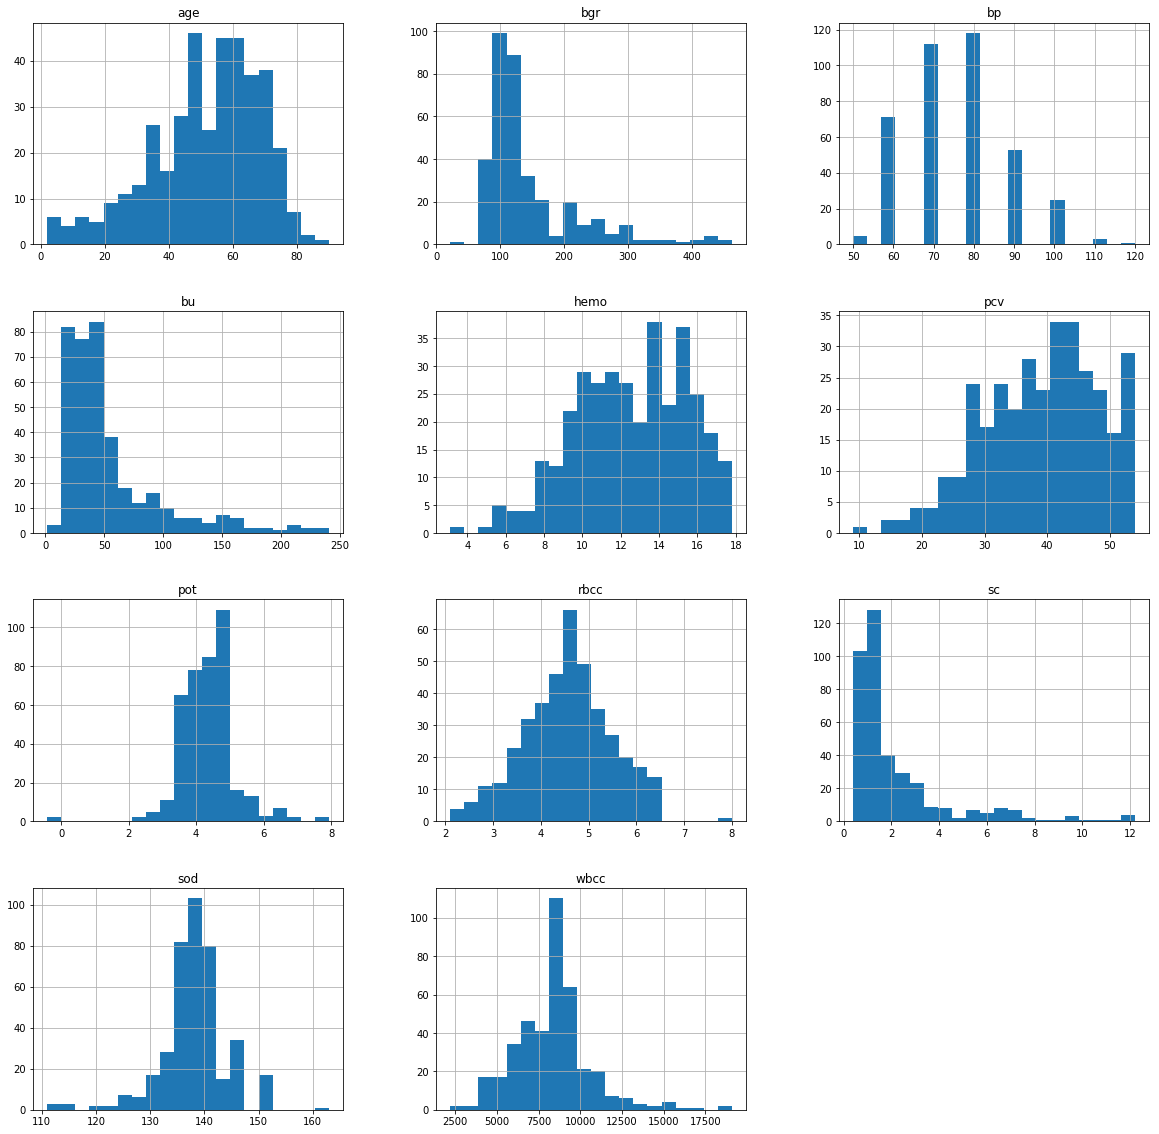

In [30]:
processed_data[numerical_parameters].hist(bins=20, figsize=(20, 20))

### Теперь можно провести замену пропущенных значений

In [31]:
processed_data[numerical_parameters] = processed_data.fillna(processed_data.median())[numerical_parameters]
processed_data[nominal_parameters] = processed_data.fillna(processed_data.mode().loc[0])[nominal_parameters]

In [32]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 36 columns):
age            400 non-null float64
bp             400 non-null float64
bgr            400 non-null float64
bu             400 non-null float64
sc             400 non-null float64
sod            400 non-null float64
pot            400 non-null float64
hemo           400 non-null float64
pcv            400 non-null float64
wbcc           400 non-null float64
rbcc           400 non-null float64
class          400 non-null int64
sg_1.01        400 non-null uint8
sg_1.015       400 non-null uint8
sg_1.02        400 non-null uint8
sg_1.025       400 non-null uint8
al_1.0         400 non-null uint8
al_2.0         400 non-null uint8
al_3.0         400 non-null uint8
al_4.0         400 non-null uint8
al_5.0         400 non-null uint8
su_1.0         400 non-null uint8
su_2.0         400 non-null uint8
su_3.0         400 non-null uint8
su_4.0         400 non-null uint8
su_5.0         400 non-

### Оценим степень корреляции между параметрами

In [33]:
corr_matrix = processed_data[numerical_parameters].corr()
corr_matrix.mean().sort_values(ascending=False)

age     0.112619
sod     0.106139
hemo    0.098530
pot     0.098135
pcv     0.096216
rbcc    0.087543
wbcc    0.084380
bp      0.079671
bgr     0.070812
bu      0.048394
sc      0.043474
dtype: float64

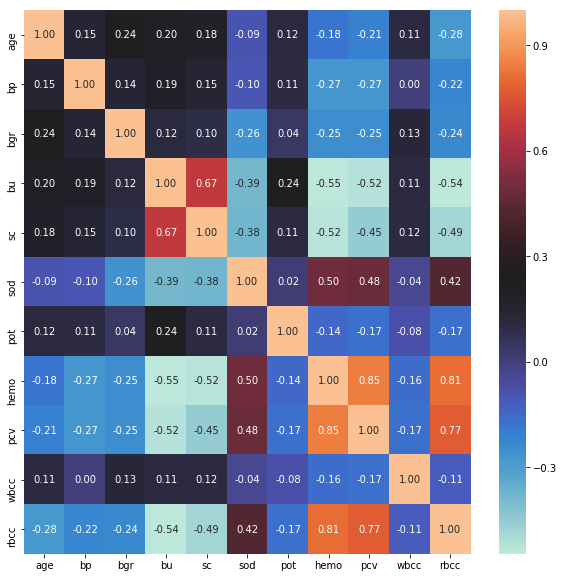

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', center = 0.25)

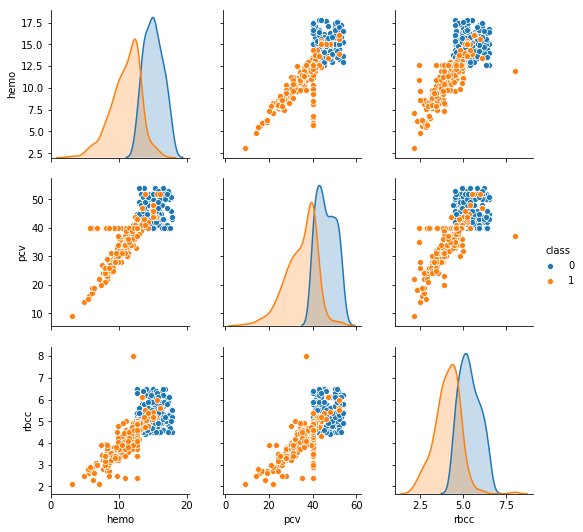

In [35]:
most_correlated_variables = ['hemo', 'pcv', 'rbcc']
sns.pairplot(data=processed_data, vars=most_correlated_variables, hue='class')

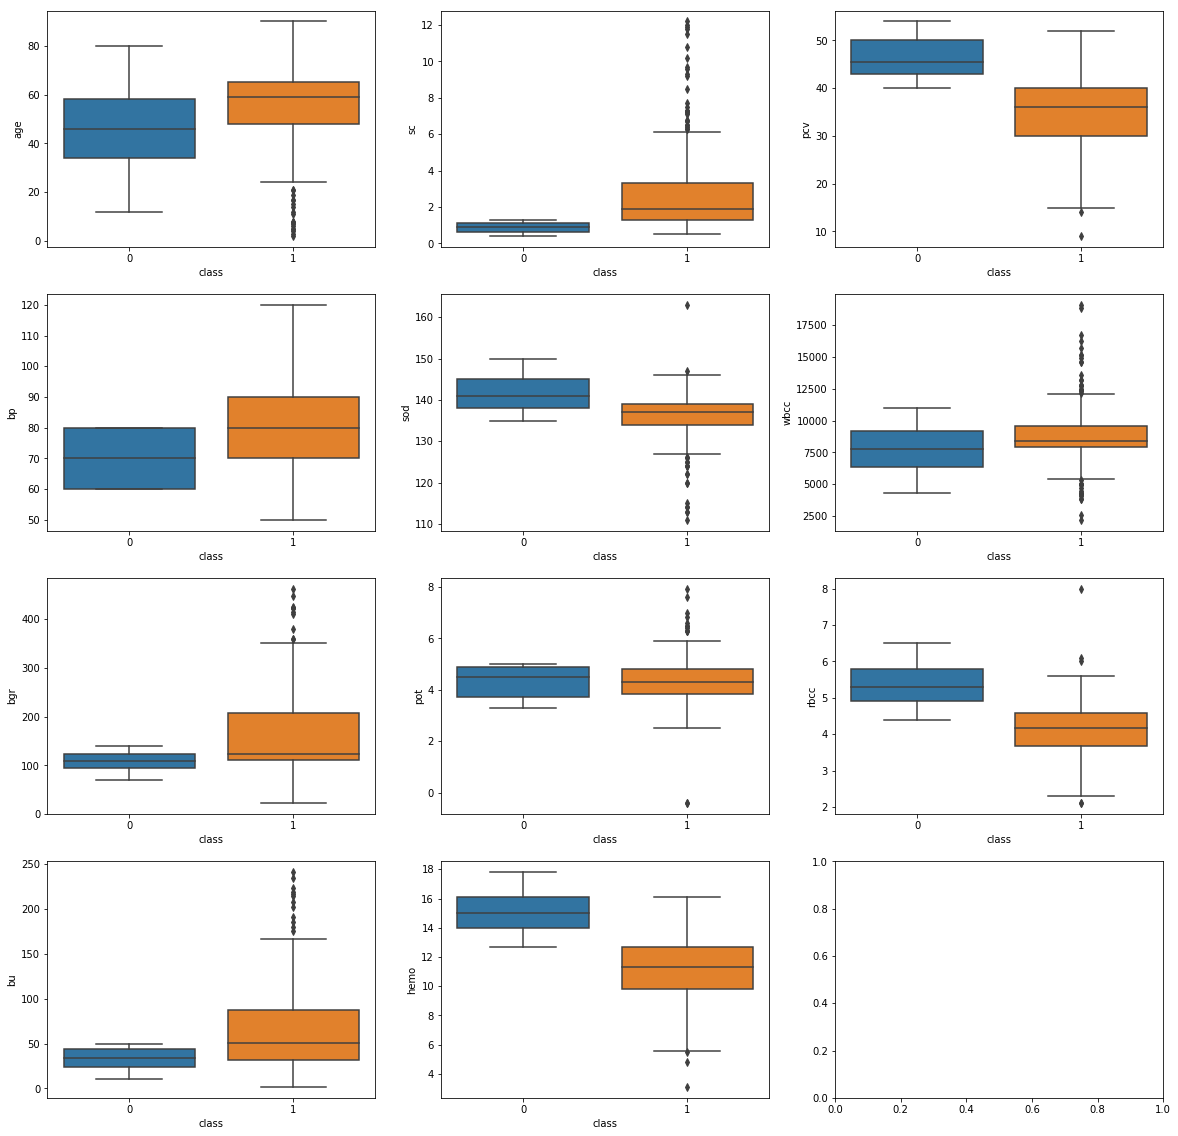

In [36]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

i_col = 0
i_row = 0

for column in processed_data[numerical_parameters].columns:
    sns.boxplot(y=column, x='class', data=processed_data, ax=ax[i_row, i_col])
    if i_row < 3:
        i_row += 1
    else:
        i_col += 1
        i_row = 0

### Только 3 параметра - hemo, pcv и rbcc - показали значительную взаимную корреляцию. Это - кандидаты на исключение из набора данных.
### Остальные параметры можно считать некоррелированными.
### Большинство численных параметров показывают хорошую разделимость значений по целевой переменной.

### Оценка значимости параметров

In [37]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

In [38]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [39]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()

In [40]:
standard_scaled_data = pd.DataFrame(standard_scaler.fit_transform(processed_data), columns=processed_data.columns)
minmax_scaled_data = pd.DataFrame(min_max_scaler.fit_transform(processed_data), columns=processed_data.columns)

In [41]:
standard_scaled_data[nominal_parameters] = processed_data[nominal_parameters]
minmax_scaled_data[nominal_parameters] = processed_data[nominal_parameters]

In [42]:
standard_scaled_data[numerical_parameters].describe().T

,count,mean,std,min,25%,50%,75%,max
age,400.0,3.630429e-16,1.001252,-2.922015,-0.563768,0.202662,0.733267,2.266128
bp,400.0,8.062995e-17,1.001252,-2.176574,-0.513480,0.318067,0.318067,3.644254
bgr,400.0,-4.676814e-17,1.001252,-1.704989,-0.593812,-0.312501,0.074301,4.497913
bu,400.0,-2.267631e-16,1.001252,-1.242647,-0.644239,-0.292234,0.130171,4.377694
sc,400.0,-1.444678e-16,1.001252,-0.798080,-0.565826,-0.380024,0.084482,4.683092
sod,400.0,5.577483e-16,1.001252,-4.333716,-0.474227,0.008209,0.490645,4.028510
pot,400.0,-5.345724e-16,1.001252,-5.819366,-0.675234,0.036095,0.665647,4.370539
hemo,400.0,-2.087219e-16,1.001252,-3.480346,-0.614612,0.039623,0.767574,1.937826
pcv,400.0,-8.731904e-16,1.001252,-3.690182,-0.623464,0.112549,0.603224,1.829911
wbcc,400.0,-5.584422e-16,1.001252,-2.711568,-0.606498,-0.022369,0.462569,4.738836


In [43]:
minmax_scaled_data[numerical_parameters].describe().T

,count,mean,std,min,25%,50%,75%,max
age,400.0,0.563210,0.192989,0.0,0.454545,0.602273,0.704545,1.0
bp,400.0,0.373929,0.172012,0.0,0.285714,0.428571,0.428571,1.0
bgr,400.0,0.274870,0.161417,0.0,0.179138,0.224490,0.286848,1.0
bu,400.0,0.221098,0.178148,0.0,0.106472,0.169102,0.244259,1.0
sc,400.0,0.145604,0.182671,0.0,0.042373,0.076271,0.161017,1.0
sod,400.0,0.518249,0.119735,0.0,0.461538,0.519231,0.576923,1.0
pot,400.0,0.571091,0.098259,0.0,0.504826,0.574634,0.636415,1.0
hemo,400.0,0.642347,0.184795,0.0,0.528912,0.649660,0.784014,1.0
pcv,400.0,0.668500,0.181383,0.0,0.555556,0.688889,0.777778,1.0
wbcc,400.0,0.363949,0.134389,0.0,0.282544,0.360947,0.426036,1.0


In [44]:
X = standard_scaled_data.loc[:,standard_scaled_data.columns!='class']
y = standard_scaled_data['class']

In [45]:
feature_selector = SelectKBest(f_classif, k=5)
feature_selector.fit(X, y)
print(X.columns[feature_selector.get_support(indices=True)])

Index(['hemo', 'pcv', 'rbcc', 'rbc_normal', 'htn_yes'], dtype='object')


In [46]:
feature_selector = SelectKBest(mutual_info_classif, k=5)
feature_selector.fit(X, y)
print(X.columns[feature_selector.get_support(indices=True)])

Index(['sc', 'sod', 'hemo', 'pcv', 'rbcc'], dtype='object')


In [47]:
X = minmax_scaled_data.loc[:,numerical_parameters]
y = minmax_scaled_data['class']

In [48]:
feature_selector = SelectKBest(chi2, k=5)
feature_selector.fit(X, y)
print(X.columns[feature_selector.get_support(indices=True)])

Index(['bu', 'sc', 'hemo', 'pcv', 'rbcc'], dtype='object')


In [49]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=1812)

In [50]:
X = standard_scaled_data.loc[:,standard_scaled_data.columns!='class']
y = standard_scaled_data['class']

In [51]:
random_forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1812,
                       verbose=0, warm_start=False)

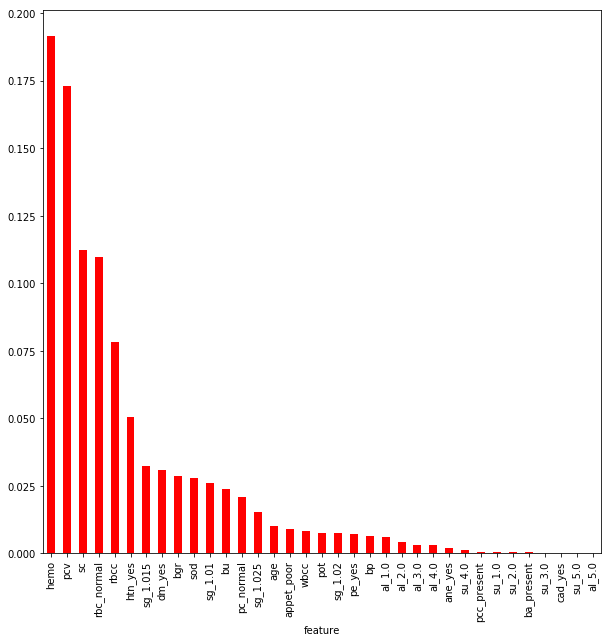

In [52]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': random_forest.feature_importances_})
feature_importances.set_index('feature', inplace=True)
feature_importances.sort_values(['importance'], ascending=False, inplace=True)
plot_colors = ['b' if coeff<0 else 'r' for coeff in feature_importances['importance'].tolist()]
feature_importances['importance'].plot('bar', figsize=(10, 10), color=plot_colors);

### В разных тестах параметры hemo, pcv и rbcc - 3 наиболее коррелированных между собой параметра - входят в 5 наиболее важных. Оставим их в наборе данных.
### <font color=red> Параметр rbc, имевший много пропущенных значений, также показал высокую значимость, что подтверждает верность решения и его использовании в модели и необходимости генерации отсутвующих значений.

## 2. Масштабирование численных параметров и кодирование номинативных.

### К номинативным параметрам уже было применено one-hot кодирование. Для масштабирования численных параметров используем standard_scaler.

In [53]:
X = standard_scaled_data.loc[:,standard_scaled_data.columns!='class']
y = standard_scaled_data['class']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019, stratify=y)

In [56]:
y.value_counts()

1    250
0    150
Name: class, dtype: int64

### Наблюдается разбаланс в пользу положительного класса.
### После оценки метрик качества моделей вернёмся к вопросу о возможном oversampling'е.

## 3. Сравнений моделей градиентного бустинга

In [57]:
import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV

import time

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    auc_score = roc_auc_score(actual, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

In [60]:
log_reg_model = LogisticRegressionCV(Cs=10, cv=5, scoring='precision')

In [61]:
log_reg_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='precision', solver='lbfgs', tol=0.0001,
                     verbose=0)

In [62]:
quality_report(log_reg_model.predict(X_test), y_test)

Accuracy: 0.983
Precision: 0.973
Recall: 1.000
f1_score: 0.986


In [63]:
log_reg_model = LogisticRegressionCV(Cs=10, cv=5, scoring='accuracy')

In [92]:
log_reg_model.fit(X_train, y_train)
quality_report(log_reg_model.predict(X_test), y_test)

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1_score: 1.000


In [93]:
def randomized_cv(model, param_grid, X, y):
    grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy')
    t_start = time.time()
    grid_search.fit(X, y)
    t_end = time.time()
    print('model {} best accuracy score is {}'.format(model.__class__.__name__, grid_search.best_score_))
    print('time for training is {} seconds'.format(t_end - t_start))
    print(grid_search.best_score_)
    return grid_search.best_estimator_

In [94]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.02, 0.05]
}
best_xgb = randomized_cv(xgb.XGBClassifier(), param_grid, X_train, y_train)

model XGBClassifier best accuracy score is 0.9785714285714285
time for training is 1.9757230281829834 seconds
0.9785714285714285


In [95]:
quality_report(best_xgb.predict(X_test), y_test)

Accuracy: 0.967
Precision: 0.987
Recall: 0.961
f1_score: 0.974


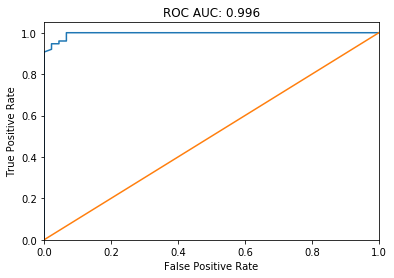

In [96]:
plot_roc_curve(best_xgb.predict_proba(X_test)[:,1], y_test)

In [101]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.02, 0.05]
}
best_lgb = randomized_cv(lgb.LGBMClassifier(), param_grid, X_train, y_train)

model LGBMClassifier best accuracy score is 0.9785714285714285
time for training is 2.2768306732177734 seconds
0.9785714285714285


In [102]:
quality_report(best_lgb.predict(X_test), y_test)

Accuracy: 0.992
Precision: 1.000
Recall: 0.987
f1_score: 0.993


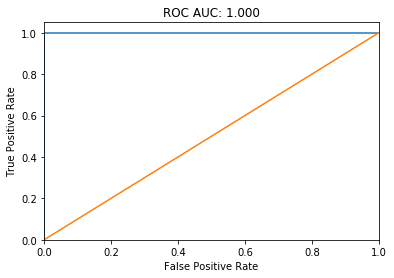

In [103]:
plot_roc_curve(best_lgb.predict_proba(X_test)[:,1], y_test)

## <font color=red>МОДЕЛИ ПОКАЗЫВАЮТ ТОЧНОСТЬ РАСПОЗНАВАНИЯ, БЛИЗКУЮ К 100%.</font>
## <font color=red>ДЛЯ ОЦЕНКИ ВОЗМОЖНОСТЕЙ БУСТИНГА И ТРЕНИРОВКИ ПОДБОРА ПАРАМЕТРОВ МОДЕЛЕЙ ЗАМЕНИМ НАБОР ДАННЫХ НА БОЛЕЕ "ПРОБЛЕМАТИЧНЫЙ"</font>

## Новые данные: https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data#
### Предсказание банкроства польских компаний

### Эти данные использовались в предыдущем домашнем задании. Поэтому воспользуемся сразу готовыми результатми подготовки данных.
### Заодно сравним разные способы составления ансамблей моделей - random forest и gradient boosting.

In [105]:
scaled_data = pd.read_csv('3year_scaled.csv')
scaled_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr8,Attr9,Attr10,Attr12,...,Attr51,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr64,class
0,0.583130,0.144185,0.700533,0.107262,-0.256758,0.452319,0.187795,0.284306,0.589700,0.538100,...,0.185463,0.472736,0.568410,0.582351,0.429152,0.452231,0.099275,0.270279,0.084109,0
1,0.562436,0.160730,0.746096,0.129688,-0.000074,0.452319,0.190701,0.332131,0.609166,0.514155,...,0.201406,0.525415,0.468606,0.546047,0.478858,0.452228,0.061195,0.224693,0.124053,0
2,0.454604,0.078944,0.813851,0.251661,0.668753,0.692723,0.297132,0.262098,0.643997,0.455521,...,0.101545,0.884214,0.454067,0.452421,0.548616,0.452228,0.069228,0.218013,0.092949,0
3,0.472322,0.150948,0.743847,0.141953,-0.103311,0.452319,0.198531,0.267190,0.615544,0.463522,...,0.157913,0.559577,0.483881,0.467174,0.517466,0.506546,0.043213,0.244483,0.072648,0
4,0.593569,0.144901,0.765825,0.153477,-0.494866,0.452319,0.204609,0.301187,0.620775,0.554542,...,0.165668,0.742862,0.577568,0.563682,0.421747,0.479975,0.026480,0.286958,0.096689,0


In [172]:
X = scaled_data.loc[:,scaled_data.columns!='class']
y = scaled_data['class']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019, stratify=y)

In [110]:
y.value_counts()

0    10008
1      495
Name: class, dtype: int64

In [119]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [120]:
oversampler = SMOTE(random_state=42)
X_res, y_res = oversampler.fit_resample(X_train, y_train)

In [134]:
X_res = pd.DataFrame(data=X_res, columns=X_train.columns)
y_res = pd.Series(y_res)

In [123]:
log_reg_model = LogisticRegressionCV(Cs=20, cv=5, scoring='precision', max_iter=1000)
log_reg_model.fit(X_res, y_res)

LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='precision', solver='lbfgs', tol=0.0001,
                     verbose=0)

In [124]:
quality_report(log_reg_model.predict(X_test), y_test)

Accuracy: 0.669
Precision: 0.658
Recall: 0.090
f1_score: 0.158


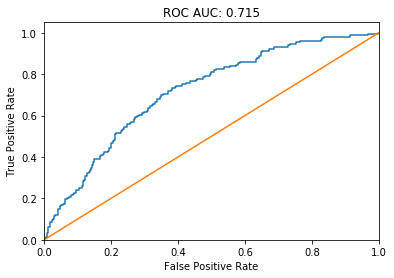

In [125]:
plot_roc_curve(log_reg_model.predict_proba(X_test)[:,1], y_test)

In [136]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.02, 0.05]
}
best_xgb = randomized_cv(xgb.XGBClassifier(), param_grid, X_res, y_res)

model XGBClassifier best accuracy score is 0.9247073936625749
time for training is 300.6760103702545 seconds
0.9247073936625749


In [137]:
quality_report(best_xgb.predict(X_test), y_test)

Accuracy: 0.890
Precision: 0.611
Recall: 0.240
f1_score: 0.345


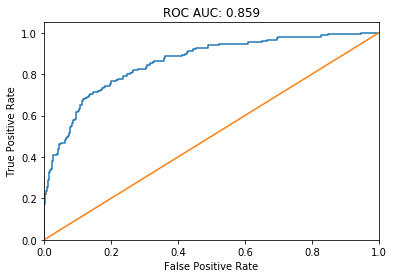

In [139]:
plot_roc_curve(best_xgb.predict_proba(X_test)[:,1], y_test)

In [140]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.02, 0.05]
}
best_lgb = randomized_cv(lgb.LGBMClassifier(), param_grid, X_res, y_res)

model LGBMClassifier best accuracy score is 0.9434770196974023
time for training is 49.48110222816467 seconds
0.9434770196974023


In [141]:
quality_report(best_lgb.predict(X_test), y_test)

Accuracy: 0.902
Precision: 0.537
Recall: 0.251
f1_score: 0.342


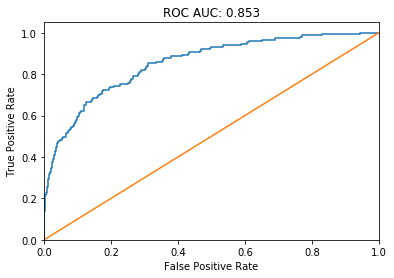

In [142]:
plot_roc_curve(best_lgb.predict_proba(X_test)[:,1], y_test)

In [144]:
from catboost import CatBoostClassifier

In [146]:
param_grid = {
    'iterations': [2, 3, 4, 5],
    'depth': [2, 3, 4, 5],
    'learning_rate': [1, 0.1, 0.01, 0.001]
}
best_cbm = randomized_cv(CatBoostClassifier(), param_grid, X_res, y_res)

0:	learn: 0.6905522	total: 88ms	remaining: 176ms
1:	learn: 0.6872404	total: 109ms	remaining: 54.6ms
2:	learn: 0.6854063	total: 129ms	remaining: 0us
0:	learn: 0.6915265	total: 23.3ms	remaining: 46.6ms
1:	learn: 0.6897880	total: 46.7ms	remaining: 23.3ms
2:	learn: 0.6882991	total: 63.4ms	remaining: 0us
0:	learn: 0.6914503	total: 26.8ms	remaining: 53.6ms
1:	learn: 0.6893571	total: 48.3ms	remaining: 24.1ms
2:	learn: 0.6877842	total: 73ms	remaining: 0us
0:	learn: 0.6918008	total: 23.7ms	remaining: 47.5ms
1:	learn: 0.6899604	total: 46.8ms	remaining: 23.4ms
2:	learn: 0.6886331	total: 67.4ms	remaining: 0us
0:	learn: 0.6915370	total: 27.4ms	remaining: 54.8ms
1:	learn: 0.6893503	total: 47.2ms	remaining: 23.6ms
2:	learn: 0.6880988	total: 70.9ms	remaining: 0us
0:	learn: 0.6931437	total: 16.9ms	remaining: 16.9ms
1:	learn: 0.6931400	total: 31.1ms	remaining: 0us
0:	learn: 0.6931451	total: 24.6ms	remaining: 24.6ms
1:	learn: 0.6931437	total: 40.3ms	remaining: 0us
0:	learn: 0.6931441	total: 19.8ms	remain

In [147]:
quality_report(best_cbm.predict(X_test), y_test)

Accuracy: 0.670
Precision: 0.208
Recall: 0.033
f1_score: 0.056


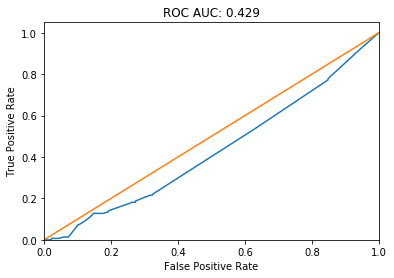

In [148]:
plot_roc_curve(best_cbm.predict_proba(X_test)[:,1], y_test)

### Лучшие результаты из 3-ёх моделей показал XGBoost. LightGBM показал близкий результат, при этом времени на обучение модели было потрачено в 6 раз меньше - 50 с вместо 300.

## Подбор гиперпараметров XGBoost

In [156]:
from sklearn.model_selection import cross_validate

### 1. Подбор количества деревьев. 

In [175]:
len(y_train)

7352

In [154]:
validation_parameters = ['accuracy', 'precision', 'recall', 'f1']

In [174]:
history=[]
for num_trees in [200, 400, 800, 1600, 3200, 6400]:
    model = xgb.XGBClassifier(n_estimators=num_trees, learning_rate=0.1)
    val_scores = cross_validate(model, X_train, y_train, scoring=validation_parameters, cv=5)
    mean_acc = np.mean(val_scores['test_accuracy'])
    mean_prc = np.mean(val_scores['test_precision'])
    mean_rcl = np.mean(val_scores['test_recall'])
    mean_f1 = np.mean(val_scores['test_f1'])
    history.append([mean_acc, mean_prc, mean_rcl, mean_f1])
    print(num_trees)
    print([mean_acc, mean_prc, mean_rcl, mean_f1])
    print('---')
learning_curves = pd.DataFrame(data=history, columns = ['accuracy', 'precision', 'recall', 'f1'])

200
[0.9644994084590358, 0.889151515151515, 0.2803312629399585, 0.4257776761471842]
---
400
[0.9655874741200827, 0.8649536550406115, 0.3178467908902691, 0.46455444147569935]
---
800
[0.9664036157941437, 0.8548275862068964, 0.3438923395445135, 0.4902191559854582]
---
1600
[0.9665400399290152, 0.8477923736544426, 0.3526293995859213, 0.49791601582838696]
---
3200
[0.9668119639160013, 0.8598054275473631, 0.3526293995859213, 0.49989732800336634]
---
6400
[0.9666760943507839, 0.8582181259600615, 0.34977225672877854, 0.49669759450171824]
---


In [180]:
test_results=[]
for num_trees in [200, 400, 800, 1600, 3200, 6400]:
    model = xgb.XGBClassifier(n_estimators=num_trees, learning_rate=0.1).fit(X_train, y_train)
    prediction= model.predict(X_test)    
    test_acc = accuracy_score(prediction, y_test)
    test_prc = precision_score(prediction, y_test)
    test_rcl = recall_score(prediction, y_test)
    test_f1 = f1_score(prediction, y_test)
    test_results.append([test_acc, test_prc, test_rcl, test_f1])
    print(num_trees)
    print([test_acc, test_prc, test_rcl, test_f1])
    print('---')
test_scores = pd.DataFrame(data=test_results, columns = ['accuracy', 'precision', 'recall', 'f1'])

200
[0.9647730879086004, 0.2550335570469799, 1.0, 0.40641711229946526]
---
400
[0.9657251666137734, 0.28859060402684567, 0.9555555555555556, 0.443298969072165]
---
800
[0.9647730879086004, 0.31543624161073824, 0.8392857142857143, 0.4585365853658537]
---
1600
[0.9650904474769915, 0.3221476510067114, 0.8421052631578947, 0.4660194174757281]
---
3200
[0.9641383687718185, 0.33557046979865773, 0.78125, 0.46948356807511743]
---
6400
[0.9647730879086004, 0.33557046979865773, 0.8064516129032258, 0.4739336492890996]
---


### Будем считать оптимальным количество деревьев 1600

### 2. Подбор глубины деревьев

In [183]:
history=[]
for depth in [2, 4, 8, 16, 32, 64]:
    model = xgb.XGBClassifier(n_estimators=1600, max_depth=depth, learning_rate=0.1)
    val_scores = cross_validate(model, X_train, y_train, scoring=validation_parameters, cv=5)
    mean_acc = np.mean(val_scores['test_accuracy'])
    mean_prc = np.mean(val_scores['test_precision'])
    mean_rcl = np.mean(val_scores['test_recall'])
    mean_f1 = np.mean(val_scores['test_f1'])
    history.append([mean_acc, mean_prc, mean_rcl, mean_f1])
    print(depth)
    print([mean_acc, mean_prc, mean_rcl, mean_f1])
    print('---')
learning_curves = pd.DataFrame(data=history, columns = ['accuracy', 'precision', 'recall', 'f1'])

2
[0.9642274844720496, 0.7985860244480933, 0.32082815734989645, 0.4576670874535381]
---
4
[0.9673559967465246, 0.8906666666666666, 0.3497722567287785, 0.501892610313663]
---
8
[0.9673558118899734, 0.9086080586080586, 0.34103519668737053, 0.4956979912368217]
---
16
[0.9655876589766341, 0.8659373219373219, 0.31792960662525876, 0.4649446110127756]
---
32
[0.9659960070984915, 0.8817692307692309, 0.32082815734989645, 0.4704102999434069]
---
64
[0.9659960070984915, 0.8817692307692309, 0.32082815734989645, 0.4704102999434069]
---


In [184]:
history=[]
for depth in [4, 5, 6, 7, 8]:
    model = xgb.XGBClassifier(n_estimators=1600, max_depth=depth, learning_rate=0.1)
    val_scores = cross_validate(model, X_train, y_train, scoring=validation_parameters, cv=5)
    mean_acc = np.mean(val_scores['test_accuracy'])
    mean_prc = np.mean(val_scores['test_precision'])
    mean_rcl = np.mean(val_scores['test_recall'])
    mean_f1 = np.mean(val_scores['test_f1'])
    history.append([mean_acc, mean_prc, mean_rcl, mean_f1])
    print(depth)
    print([mean_acc, mean_prc, mean_rcl, mean_f1])
    print('---')
learning_curves = pd.DataFrame(data=history, columns = ['accuracy', 'precision', 'recall', 'f1'])

4
[0.9673559967465246, 0.8906666666666666, 0.3497722567287785, 0.501892610313663]
---
5
[0.9676277358769594, 0.8967439967439967, 0.35258799171842653, 0.5060765961294991]
---
6
[0.9670838879029873, 0.8882328042328043, 0.3439337474120083, 0.4957245741025078]
---
7
[0.9665400399290152, 0.8851778591778592, 0.3324223602484472, 0.48302255264033045]
---
8
[0.9673558118899734, 0.9086080586080586, 0.34103519668737053, 0.4956979912368217]
---


In [185]:
test_results=[]
for depth in [4, 5, 6, 7, 8]:
    model = xgb.XGBClassifier(n_estimators=1600, max_depth=depth, learning_rate=0.1).fit(X_train, y_train)
    prediction= model.predict(X_test)    
    test_acc = accuracy_score(prediction, y_test)
    test_prc = precision_score(prediction, y_test)
    test_rcl = recall_score(prediction, y_test)
    test_f1 = f1_score(prediction, y_test)
    test_results.append([test_acc, test_prc, test_rcl, test_f1])
    print(depth)
    print([test_acc, test_prc, test_rcl, test_f1])
    print('---')
test_scores = pd.DataFrame(data=test_results, columns = ['accuracy', 'precision', 'recall', 'f1'])

4
[0.9660425261821644, 0.3422818791946309, 0.85, 0.4880382775119617]
---
5
[0.9650904474769915, 0.33557046979865773, 0.819672131147541, 0.4761904761904763]
---
6
[0.9650904474769915, 0.3221476510067114, 0.8421052631578947, 0.4660194174757281]
---
7
[0.9657251666137734, 0.3288590604026846, 0.8596491228070176, 0.47572815533980584]
---
8
[0.9644557283402094, 0.3087248322147651, 0.8363636363636363, 0.45098039215686275]
---


### Оптимальная глубина 4

### 3. Подбор скорости обучения

In [186]:
history=[]
for rate in [0.001, 0.01, 0.1, 0.2, 0.3]:
    model = xgb.XGBClassifier(n_estimators=1600, max_depth=4, learning_rate=rate)
    val_scores = cross_validate(model, X_train, y_train, scoring=validation_parameters, cv=5)
    mean_acc = np.mean(val_scores['test_accuracy'])
    mean_prc = np.mean(val_scores['test_precision'])
    mean_rcl = np.mean(val_scores['test_recall'])
    mean_f1 = np.mean(val_scores['test_f1'])
    history.append([mean_acc, mean_prc, mean_rcl, mean_f1])
    print(rate)
    print([mean_acc, mean_prc, mean_rcl, mean_f1])
    print('---')
learning_curves = pd.DataFrame(data=history, columns = ['accuracy', 'precision', 'recall', 'f1'])

0.001
[0.9617788745933156, 0.9549019607843139, 0.19937888198757764, 0.328231616445919]
---
0.01
[0.965315734989648, 0.9416746411483252, 0.28037267080745343, 0.4318245923863902]
---
0.1
[0.9673559967465246, 0.8906666666666666, 0.3497722567287785, 0.501892610313663]
---
0.2
[0.9666759094942325, 0.8588122605363985, 0.34973084886128364, 0.4969703345255628]
---
0.3
[0.9665396702159125, 0.8515672322568874, 0.34968944099378885, 0.49566541705716965]
---


In [187]:
test_results=[]
for rate in [0.001, 0.01, 0.1, 0.2, 0.3]:
    model = xgb.XGBClassifier(n_estimators=1600, max_depth=4, learning_rate=rate).fit(X_train, y_train)
    prediction= model.predict(X_test)    
    test_acc = accuracy_score(prediction, y_test)
    test_prc = precision_score(prediction, y_test)
    test_rcl = recall_score(prediction, y_test)
    test_f1 = f1_score(prediction, y_test)
    test_results.append([test_acc, test_prc, test_rcl, test_f1])
    print(rate)
    print([test_acc, test_prc, test_rcl, test_f1])
    print('---')
test_scores = pd.DataFrame(data=test_results, columns = ['accuracy', 'precision', 'recall', 'f1'])

0.001
[0.9603300539511266, 0.1610738255033557, 1.0, 0.2774566473988439]
---
0.01
[0.9654078070453824, 0.2751677852348993, 0.9761904761904762, 0.4293193717277487]
---
0.1
[0.9660425261821644, 0.3422818791946309, 0.85, 0.4880382775119617]
---
0.2
[0.9663598857505554, 0.3422818791946309, 0.864406779661017, 0.4903846153846155]
---
0.3
[0.9657251666137734, 0.3422818791946309, 0.8360655737704918, 0.48571428571428565]
---


### Оптимальная скорость обучения 0.2

### 4. Уточнение количества деревьев

In [188]:
history=[]
for num_trees in [100, 200, 300, 400, 800, 1600]:
    model = xgb.XGBClassifier(n_estimators=num_trees, max_depth=4, learning_rate=0.2)
    val_scores = cross_validate(model, X_train, y_train, scoring=validation_parameters, cv=5)
    mean_acc = np.mean(val_scores['test_accuracy'])
    mean_prc = np.mean(val_scores['test_precision'])
    mean_rcl = np.mean(val_scores['test_recall'])
    mean_f1 = np.mean(val_scores['test_f1'])
    history.append([mean_acc, mean_prc, mean_rcl, mean_f1])
    print(num_trees)
    print([mean_acc, mean_prc, mean_rcl, mean_f1])
    print('---')
learning_curves = pd.DataFrame(data=history, columns = ['accuracy', 'precision', 'recall', 'f1'])

100
[0.9653161047027506, 0.8963636363636363, 0.2977639751552795, 0.446765060906686]
---
200
[0.965316289559302, 0.8691778591778592, 0.3093167701863354, 0.455632427843803]
---
300
[0.9662683007985804, 0.8884415954415953, 0.323768115942029, 0.4743760611205433]
---
400
[0.9665402247855663, 0.8743035661656352, 0.33821946169772255, 0.48749819076566797]
---
800
[0.9668119639160013, 0.8707675466296155, 0.34683229813664596, 0.4959400710908346]
---
1600
[0.9666759094942325, 0.8588122605363985, 0.34973084886128364, 0.4969703345255628]
---


In [189]:
history=[]
for num_trees in [800, 900, 1000, 1200, 1400, 1600]:
    model = xgb.XGBClassifier(n_estimators=num_trees, max_depth=4, learning_rate=0.2)
    val_scores = cross_validate(model, X_train, y_train, scoring=validation_parameters, cv=5)
    mean_acc = np.mean(val_scores['test_accuracy'])
    mean_prc = np.mean(val_scores['test_precision'])
    mean_rcl = np.mean(val_scores['test_recall'])
    mean_f1 = np.mean(val_scores['test_f1'])
    history.append([mean_acc, mean_prc, mean_rcl, mean_f1])
    print(num_trees)
    print([mean_acc, mean_prc, mean_rcl, mean_f1])
    print('---')
learning_curves = pd.DataFrame(data=history, columns = ['accuracy', 'precision', 'recall', 'f1'])

800
[0.9668119639160013, 0.8707675466296155, 0.34683229813664596, 0.4959400710908346]
---
900
[0.9666760943507837, 0.8697093455714147, 0.34397515527950306, 0.49282624824210747]
---
1000
[0.9668119639160013, 0.8707675466296155, 0.34683229813664596, 0.4959400710908346]
---
1200
[0.9668119639160011, 0.865426017150155, 0.34973084886128364, 0.49804421768707485]
---
1400
[0.9665400399290149, 0.8577540594781974, 0.3468737060041408, 0.49385651167683564]
---
1600
[0.9666759094942325, 0.8588122605363985, 0.34973084886128364, 0.4969703345255628]
---


In [194]:
test_results=[]
for num_trees in [800, 900, 1000, 1200, 1400, 1600]:
    model = xgb.XGBClassifier(n_estimators=num_trees, learning_rate=0.2, max_depth=4).fit(X_train, y_train)
    prediction= model.predict(X_test)    
    test_acc = accuracy_score(prediction, y_test)
    test_prc = precision_score(prediction, y_test)
    test_rcl = recall_score(prediction, y_test)
    test_f1 = f1_score(prediction, y_test)
    test_results.append([test_acc, test_prc, test_rcl, test_f1])
    print(num_trees)
    print([test_acc, test_prc, test_rcl, test_f1])
    print('---')
test_scores = pd.DataFrame(data=test_results, columns = ['accuracy', 'precision', 'recall', 'f1'])

800
[0.9660425261821644, 0.33557046979865773, 0.8620689655172413, 0.4830917874396135]
---
900
[0.9660425261821644, 0.33557046979865773, 0.8620689655172413, 0.4830917874396135]
---
1000
[0.9660425261821644, 0.33557046979865773, 0.8620689655172413, 0.4830917874396135]
---
1200
[0.9660425261821644, 0.33557046979865773, 0.8620689655172413, 0.4830917874396135]
---
1400
[0.9663598857505554, 0.3422818791946309, 0.864406779661017, 0.4903846153846155]
---
1600
[0.9663598857505554, 0.3422818791946309, 0.864406779661017, 0.4903846153846155]
---


### Уточнённое количество деревьев 1400

### 5. Влияние oversampling'а

In [199]:
model = xgb.XGBClassifier(n_estimators=1400, learning_rate=0.2, max_depth=4).fit(X_train, y_train)
prediction= model.predict(X_test)
prediction_proba = model.predict_proba(X_test)

### Результаты обучения на исходном наборе

In [200]:
quality_report(prediction, y_test)

Accuracy: 0.966
Precision: 0.342
Recall: 0.864
f1_score: 0.490


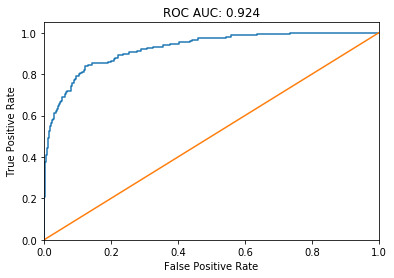

In [201]:
plot_roc_curve(prediction_proba[:,1], y_test)

In [203]:
model = xgb.XGBClassifier(n_estimators=1400, learning_rate=0.2, max_depth=4).fit(X_res, y_res)
prediction= model.predict(X_test)
prediction_proba = model.predict_proba(X_test)

### Результаты обучения на искусственно расширенном наборе

In [204]:
quality_report(prediction, y_test)

Accuracy: 0.959
Precision: 0.409
Recall: 0.598
f1_score: 0.486


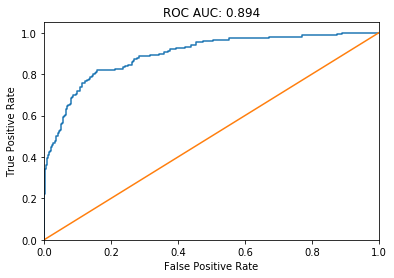

In [205]:
plot_roc_curve(prediction_proba[:,1], y_test)

### Расширение обучающей выборки позволило повысить precision на 6%, однако, другие метрики несколько ухудшились.

### 6. Сравнение с другими моделями

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
forest_classifier = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
forest_prediction = forest_classifier.predict(X_test)
forest_probabilities = forest_classifier.predict_proba(X_test)

In [210]:
quality_report(forest_prediction, y_test)

Accuracy: 0.952
Precision: 0.040
Recall: 0.429
f1_score: 0.074


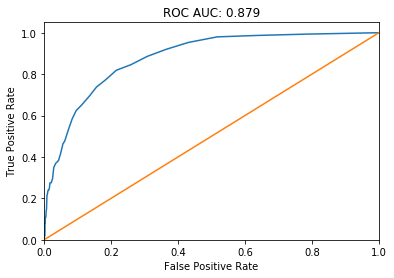

In [209]:
plot_roc_curve(forest_probabilities[:, 1], y_test)

In [211]:
forest_classifier = RandomForestClassifier(n_estimators=100).fit(X_res, y_res)
forest_prediction = forest_classifier.predict(X_test)
forest_probabilities = forest_classifier.predict_proba(X_test)

In [212]:
quality_report(forest_prediction, y_test)

Accuracy: 0.946
Precision: 0.242
Recall: 0.387
f1_score: 0.298


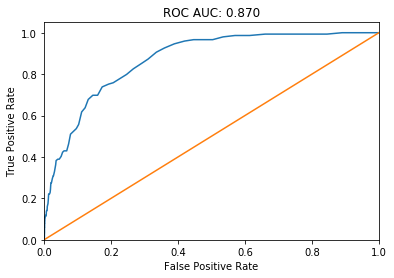

In [213]:
plot_roc_curve(forest_probabilities[:, 1], y_test)

### По всем метрикам random forest показывает худшие результаты на полной и расширенной обучающей выборках. Эффект oversampling'а тот же - повышается precision, остальные метрики ухудшаются. 

## <font color=red>ИСПОЛЬЗОВАНИЕ ГРАДИЕНТНОГО БУСТИНГА ПОЗВОЛИЛО ЗНАЧИТЕЛЬНО ПОВЫСИТЬ ЭФФЕКТИВНОСТЬ ДЕРЕВЬЕВ РЕШЕНИЙ ПО СРАВНЕНИЮ СО СЛУЧАЙНЫМ ЛЕСОМ</font>